<a href="https://colab.research.google.com/github/sathyasupritha/feynee-labs3/blob/main/project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Dataset
df = pd.read_csv("ev2_bikewale.csv")

# Data Preprocessing
# Selecting relevant columns
df_cleaned = df[['Model Name', 'rating', 'Visual Appeal', 'Reliability', 'Performance',
                 'Service Experience', 'Extra Features', 'Comfort', 'Maintenance cost',
                 'Value for Money', 'Ridden for', 'review']].copy()

# Handling missing values
df_cleaned.fillna(df_cleaned.median(numeric_only=True), inplace=True)
df_cleaned['Ridden for'].fillna(df_cleaned['Ridden for'].mode()[0], inplace=True)
df_cleaned['review'].fillna("No review provided", inplace=True)


<ipython-input-2-7f7697e7ce89>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Ridden for'].fillna(df_cleaned['Ridden for'].mode()[0], inplace=True)
<ipython-input-2-7f7697e7ce89>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

In [ ]:
# Segmentation Analysis
# Categorizing EVs based on ratings
def segment_rating(rating):
    if rating >= 4.5:
        return 'High'
    elif 3.5 <= rating < 4.5:
        return 'Medium'
    else:
        return 'Low'

df_cleaned['Rating Segment'] = df_cleaned['rating'].apply(segment_rating)

# Categorizing EVs based on usage duration
def segment_usage(duration):
    if 'year' in str(duration):
        return 'Long-term'
    elif 'month' in str(duration):
        return 'Mid-term'
    else:
        return 'Short-term'

df_cleaned['Usage Segment'] = df_cleaned['Ridden for'].apply(segment_usage)


<ipython-input-4-d9c93c55da35>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x="Model Name", y="rating", palette="Set2")


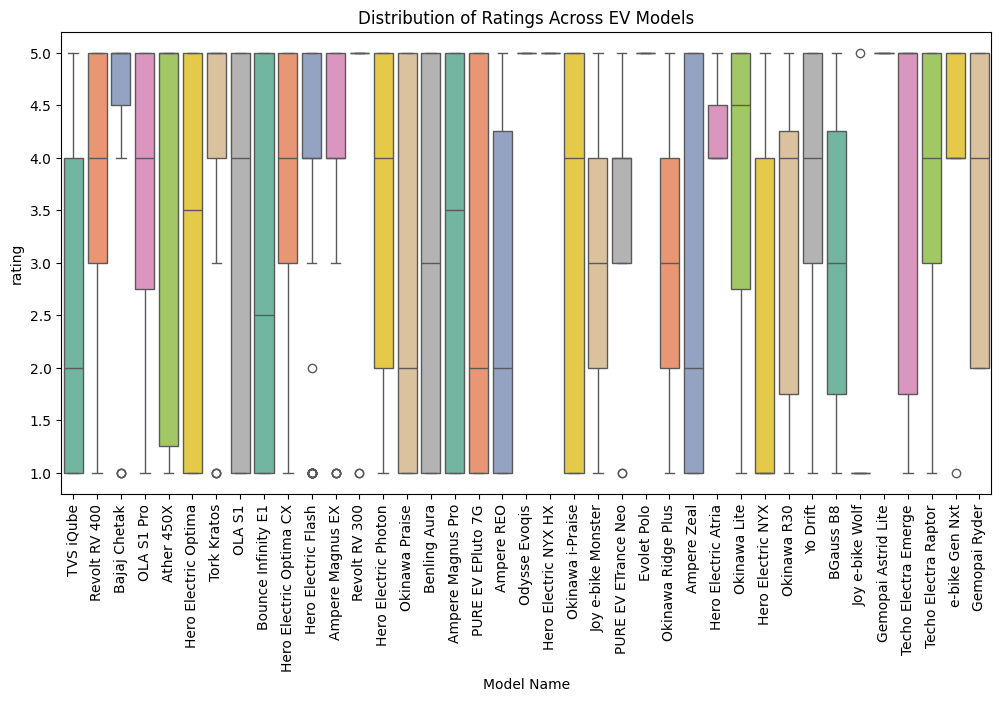

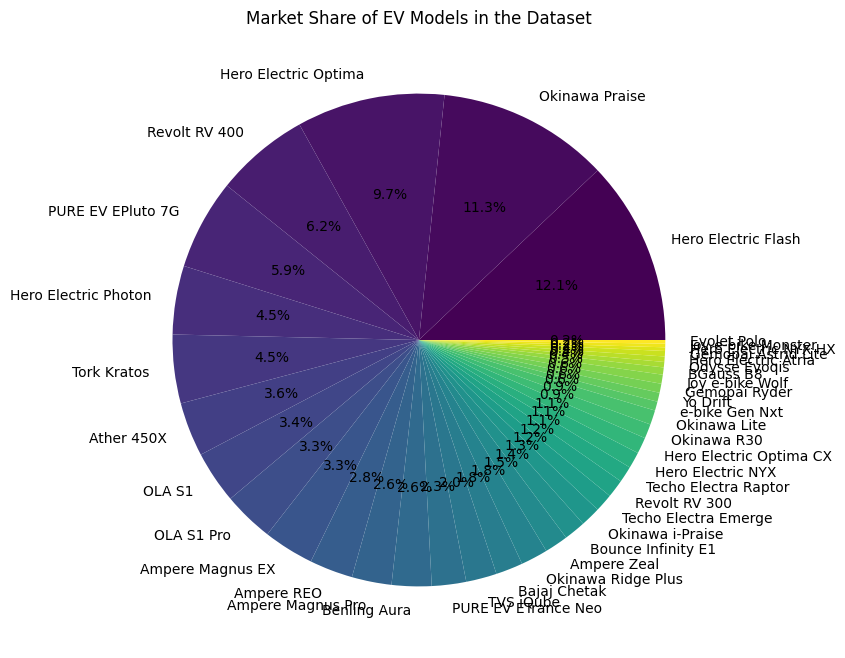

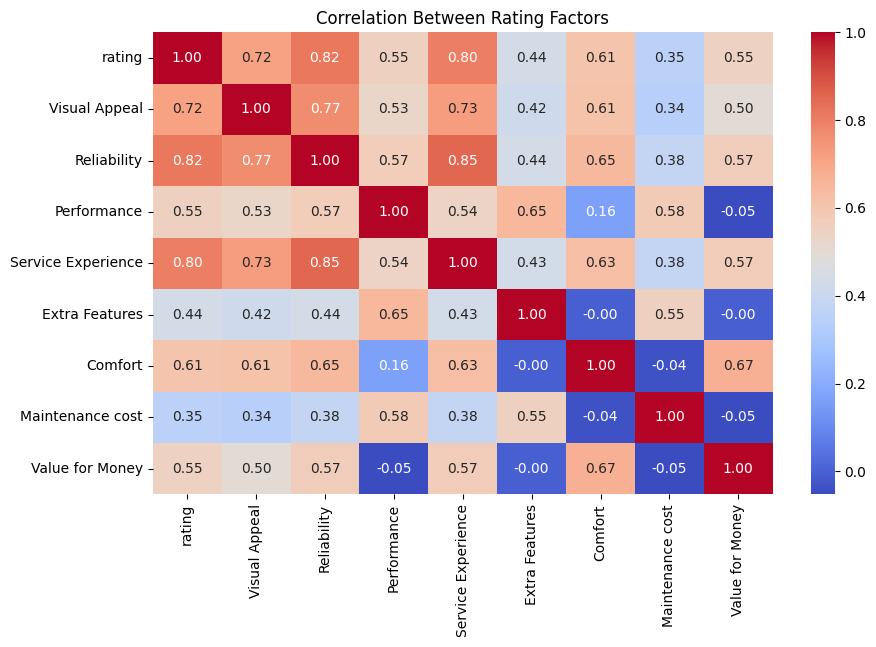

<ipython-input-4-d9c93c55da35>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Rating Segment', palette='coolwarm')


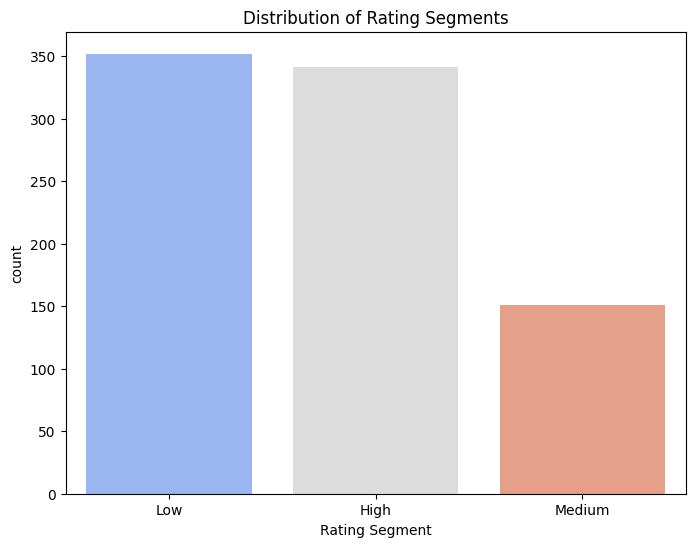

<ipython-input-4-d9c93c55da35>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Usage Segment', palette='viridis')


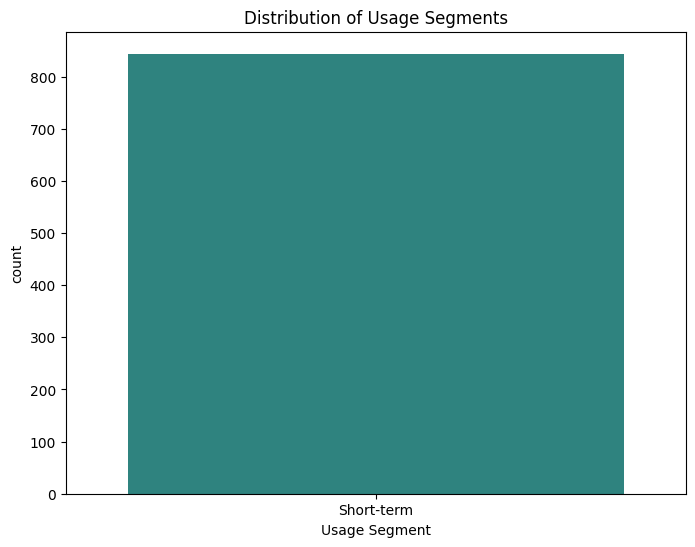

In [ ]:
# Visualization 1: Ratings Distribution by Model
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x="Model Name", y="rating", palette="Set2")
plt.xticks(rotation=90)
plt.title("Distribution of Ratings Across EV Models")
plt.show()

# Visualization 2: Market Share by Model
plt.figure(figsize=(8, 8))
df_cleaned["Model Name"].value_counts().plot(kind="pie", autopct="%1.1f%%", cmap="viridis")
plt.title("Market Share of EV Models in the Dataset")
plt.ylabel("")
plt.show()

# Visualization 3: Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Rating Factors")
plt.show()

# Visualization 4: Rating Segments Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='Rating Segment', palette='coolwarm')
plt.title("Distribution of Rating Segments")
plt.show()

# Visualization 5: Usage Segments Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='Usage Segment', palette='viridis')
plt.title("Distribution of Usage Segments")
plt.show()
